**Dénes Csala**  
University of Bristol, 2022  

Based on *Elements of Data Science* ([Allen B. Downey](https://allendowney.com), 2021) and *Python Data Science Handbook* ([Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/), 2018)

License: [MIT](https://mit-license.org/)

# Basic Principles of Machine Learning

Here we'll dive into the basic principles of machine learning, and how to
utilize them via the Scikit-Learn API.

After briefly introducing scikit-learn's *Estimator* object, we'll cover **supervised learning**, including *classification* and *regression* problems, and **unsupervised learning**, including *dimensinoality reduction* and *clustering* problems.

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

## The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a linear regression is implemented as so:

In [21]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [22]:
model = LinearRegression()
print(model)

LinearRegression()


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [23]:
x = np.arange(10)
y = -4 * x  +2

In [24]:
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[  2  -2  -6 -10 -14 -18 -22 -26 -30 -34]


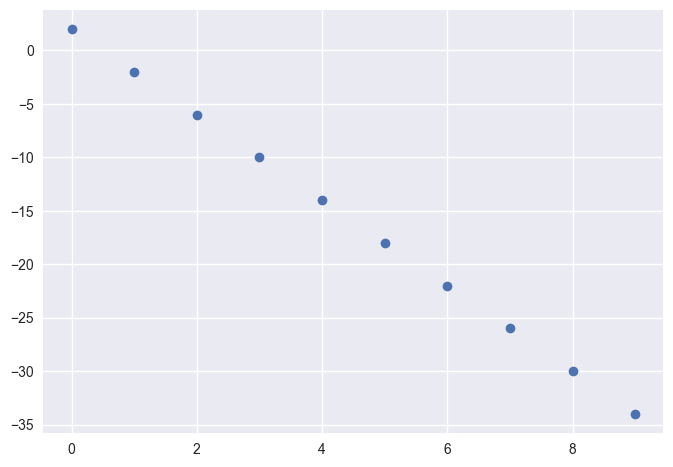

In [25]:
plt.plot(x, y, 'o');

Converting to the standard machine learning **X** matrix and **y** vector format

In [26]:
# The input data for sklearn is 2D: (samples == 10 x features == 1)
X = x[:, np.newaxis] #this is how you make matrices quickly in python, using numpy
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[  2  -2  -6 -10 -14 -18 -22 -26 -30 -34]


Once you have **X** and **y**, you can _fit_ a `model` to them. This means that the models initially random parameters will be adjusted so that we can best get to **y** using the information in **X**. For larger models, this process is called _training_. For simple models, we just use _fit_ because it's seemingly instant.

In [27]:
# fit the model on our data
model.fit(X, y)

LinearRegression()

The model parameters are depedent on the model type. As you might expect, a regression model has `coefficients` and an `intercept`.

In [28]:
# underscore at the end indicates a fit parameter
# predicted values - pretty good fit to our original points distribution, which was along a line
print(model.coef_)
print(model.intercept_)

[-4.]
2.0000000000000036


The model found a line with a slope 2 and intercept 1, as we'd expect. Once fitted, we can use it to make predictions about points previously unknown. We do this via the `predict` function. Input needs to be the same format as **X**.

In [29]:
X2 = np.array([[4.5],[4.6],[2.7],[8.9],])
y2 = model.predict(X2)
y2

array([-16. , -16.4,  -8.8, -33.6])

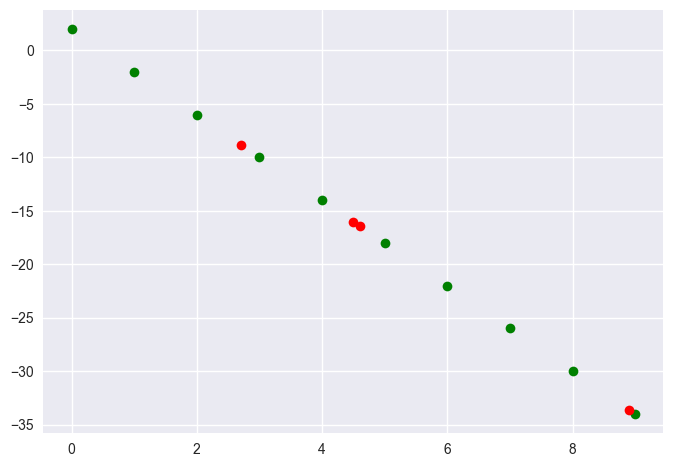

In [30]:
plt.plot(X.flatten(), y, 'o',color='green');
plt.plot(X2.flatten(), y2, 'o',color='red');

## Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

### Classification Example
K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [31]:
from sklearn import neighbors, datasets

iris = datasets.load_iris() #back to the familiar Iris dataset
X, y = iris.data, iris.target

X.shape

(150, 4)

In [32]:
# create the model
knn = neighbors.KNeighborsClassifier()
# knn = neighbors.KNeighborsClassifier(n_neighbors=15) #you can specify the number of neighbors if you'd like

# fit the model
knn.fit(X, y)

KNeighborsClassifier()

In [33]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [34]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2]])

print(result,iris.target_names[result])

[1] ['versicolor']


In [35]:
# Multiple flowers at once? Sure. As long as is in the X format

X2=np.array([[3, 5, 4, 2],[3.5, 2, 3, 2],[5, 2.8, 0.4, 1]])
result = knn.predict(X2)

print(result,iris.target_names[result])

[1 1 0] ['versicolor' 'versicolor' 'setosa']


Let's see the results!

In [36]:
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, 0:2]  # we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
                #try 2:4 
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=15) #Try changing the number of neighbors
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')

Shaded areas are the predicted classes by the model. The point colors are the actual, human-labeled classes of the original (training) data.

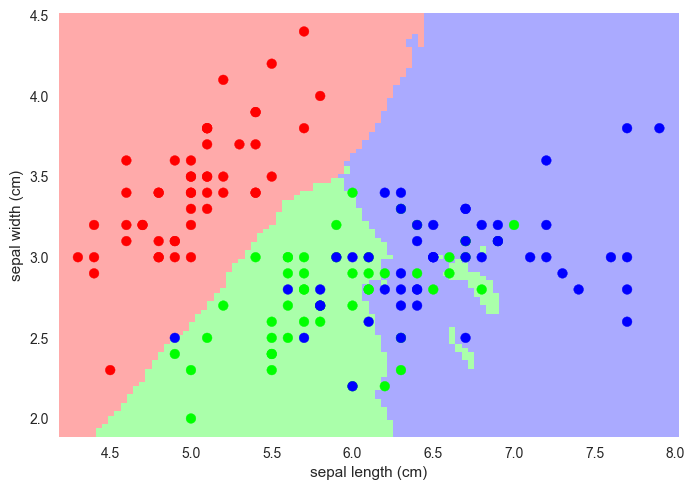

In [37]:
plot_iris_knn()

`nr_of_neighbors` is a parameter of this specific model, the `KNeighborsClassifier`. If you change it, you get a model of the same type but with different characteristics. It changes the _behavior_ of your model. Therefore, it is called a _hyperparameter_.

---

#### Exercise

Use a different estimator on the same problem: ``sklearn.svm.SVC``.

*Note that you don't have to know what it is in order to use it. We're simply trying out the interface here*

*If you finish early, try to create a similar plot as above with the SVC (Support Vector Classifier) estimator.*

In [38]:
from sklearn.svm import SVC

In [39]:
my_svc_model=SVC()

In [40]:
my_svc_model.fit(X,y)

SVC()

In [41]:
result = my_svc_model.predict([[3, 5, 4, 2]]) #let's do the same prediction as with the knn!

print(result,iris.target_names[result])

[1] ['versicolor']


In [42]:
#SVC can also do probabilistic predictions - i.e. not discrete classes
my_svc_model2=SVC(probability=True)
my_svc_model2.fit(X,y)

SVC(probability=True)

In [43]:
my_svc_model2.predict_proba([[3, 5, 4, 2]])

array([[0.24181951, 0.54676008, 0.21142041]])

In [44]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

---

### Regression Example

One of the simplest regression problems is fitting a line to data, which we saw above.
Scikit-learn also contains more sophisticated regression algorithms

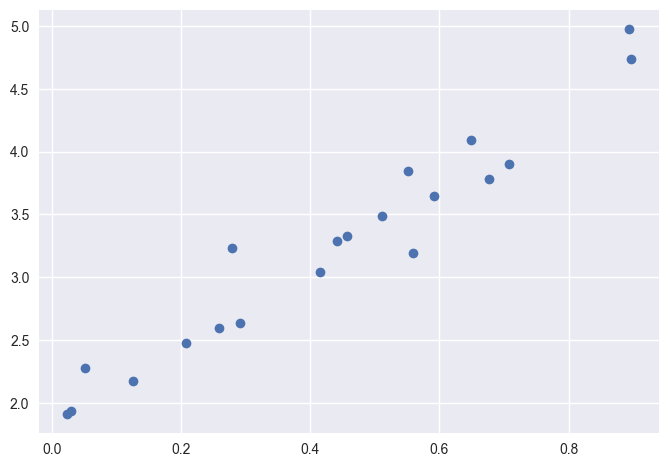

In [45]:
# Create some simple data
import numpy as np
np.random.seed(3)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.randn(20)*0.2

plt.plot(X.squeeze(), y, 'o');

As above, we can plot a line of best fit:

[3.13797034]
1.876805080030881


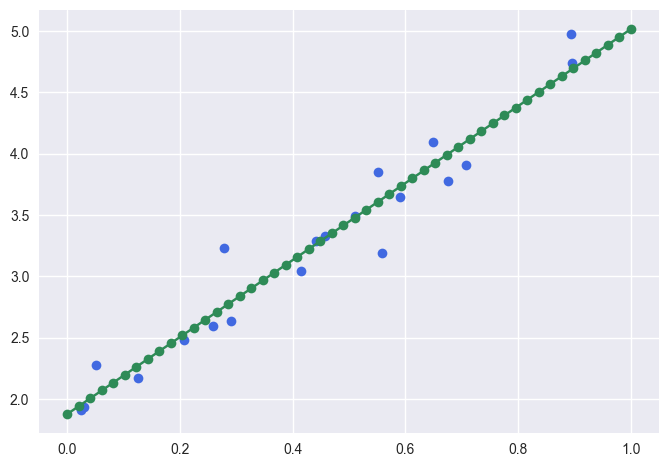

In [46]:
model = LinearRegression()
model.fit(X, y)

# Plot the data and the model prediction
X_fit = np.linspace(0, 1, 50)[:, np.newaxis] #a new X matrix with 50 evenly distributed points
y_fit = model.predict(X_fit)

plt.plot(X.squeeze(), y, 'o', color='royalBlue')
plt.plot(X_fit.squeeze(), y_fit, 'o', color='seaGreen');
plt.plot(X_fit.squeeze(), y_fit, color='seaGreen');
print(model.coef_)
print(model.intercept_)

Scikit-learn also has some more sophisticated models, which can respond to finer features in the data. Syntax is the same.

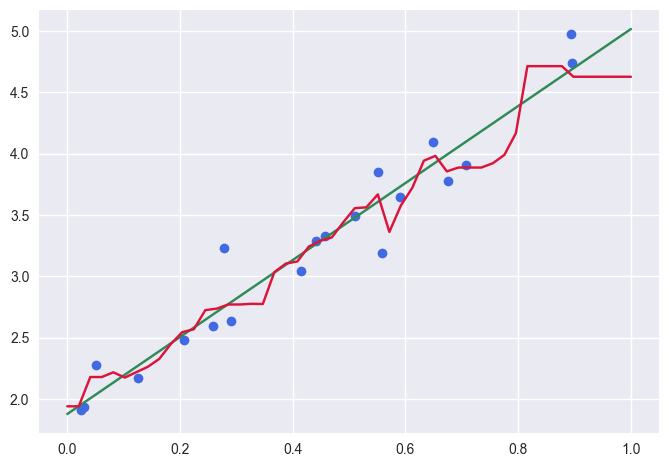

In [47]:
# Fit a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X, y)

# Plot the data and the model prediction
y_fit2 = model2.predict(X_fit)

plt.plot(X.squeeze(), y, 'o', color='royalBlue')
plt.plot(X_fit.squeeze(), y_fit, color='seaGreen');
plt.plot(X_fit.squeeze(), y_fit2, color='crimson');

Whether either of these is a "good" fit or not depends on a number of things; we'll discuss details of how to choose a model later.

In [48]:
model.score(X_fit,y_fit), model.score(X,y)

(1.0, 0.9421517757298443)

In [49]:
model2.score(X_fit,y_fit2), model2.score(X,y)

(1.0, 0.9783685449450124)

## Unsupervised Learning: Dimensionality Reduction and Clustering

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding similarities between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

### Dimensionality Reduction Example

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [50]:
X, y = iris.data, iris.target

from sklearn.decomposition import PCA #import the PCA model from the decomposition model collection. Same syntax as before, but we don't have a y!
pca = PCA(n_components=2) # Create PCA model. Need to specify number of components. We will use 2, in order to be able to plot them in 2D space. n_components is a hyperparameter of the PCA model 
pca.fit(X)
X_reduced = pca.transform(X) #Dimensionality reduction models have a special function called transform, where you transform the data into the new 2 dimensions from the old 4. This changes the shape of your data!
print("Original dataset shape:",X.shape, "Reduced dataset shape:", X_reduced.shape)

Original dataset shape: (150, 4) Reduced dataset shape: (150, 2)


In [51]:
pca.components_ #the pca model has the property components_
# Naturally, since it create a mixture of all the input dimensions, each components has 4 terms. Then there are two components, with 4 terms each.  

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [52]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

PCA is simple, linear model, so we can even consturct the meaning of the 2 components (for other, more complex models this is not so straightforward):
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


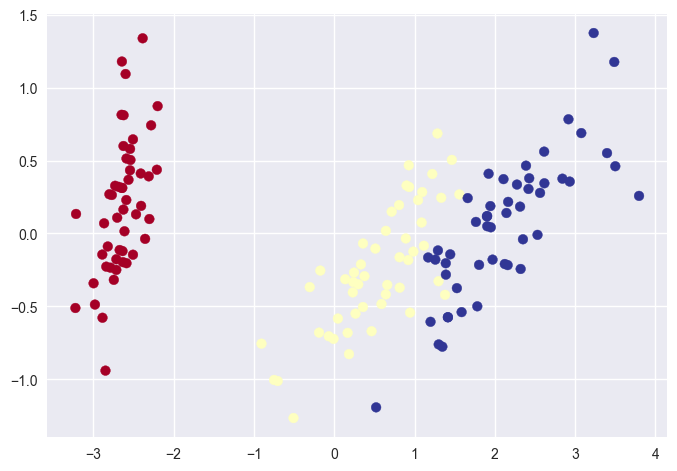

In [53]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

print("PCA is simple, linear model, so we can even consturct the meaning of the 2 components (for other, more complex models this is not so straightforward):")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

The axes don't have any meaning, they are 2 fictional dimensions, created from the original 4 in a manner that separates them from each other the most. 

#### Clustering Example

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

In [54]:
from sklearn.cluster import KMeans #same syntax, import the KMeans model from cluster model collection
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in Kmeans
k_means.fit(X_reduced)
y_pred = k_means.predict(X_reduced)

In [55]:
y_pred=[int(str(i).replace('2','4').replace('1','2').replace('4','1')) for i in y_pred] #swap cluster indices for consistent coloring, only optical tuning

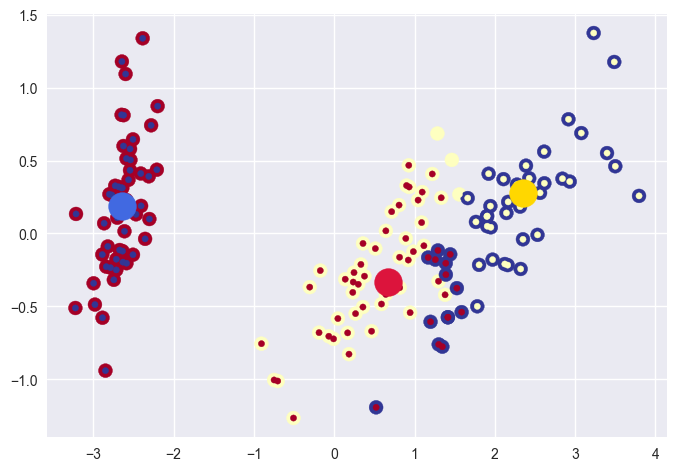

In [56]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=100, c=y,
           cmap='RdYlBu') #original classes, large dots

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=20, c=y_pred,
           cmap='RdYlBu') #original classes, smaller dots

colors=['crimson','royalBlue','gold']
for i,k in enumerate(k_means.cluster_centers_):
  plt.scatter(k[0],k[1], s=400, c=colors[i]) #cluster centers, huge dots

### Recap: Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we'll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.predict()` : predict labels in clustering algorithms.
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

## Model Validation

An important piece of machine learning is **model validation**: that is, determining how well your model will generalize from the training data to future unlabeled data. Let's look at an example using the *nearest neighbor classifier*. This is a very simple classifier: it simply stores all training data, and for any unknown quantity, simply returns the label of the closest training point.

With the iris data, it very easily returns the correct prediction for each of the input points:

In [57]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


A more useful way to look at the results is to view the **confusion matrix**, or the matrix showing the frequency of inputs and outputs:

In [58]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


For each class, all 50 training samples are correctly identified. But this **does not mean that our model is perfect!** In particular, such a model generalizes extremely poorly to new data. This is called _overfitting_. We can simulate this by splitting our data into a *training set* and a *testing set*. Scikit-learn contains some convenient routines to do this:

In [59]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[14  0  0]
 [ 0 15  0]
 [ 0  0  9]]


This paints a better picture of the true performance of our classifier: apparently there is some confusion between the second and third species, which we might anticipate given what we've seen of the data above.

This is why it's **extremely important** to use a train/test split when evaluating your models.  We'll go into more depth on model evaluation later.

## How to Choose your Estimator: Flow Chart

This is a flow chart created by scikit-learn super-contributor [Andreas Mueller](https://github.com/amueller) which gives a nice summary of which algorithms to choose in various situations. Keep it around as a handy reference!

In [60]:
from IPython.display import Image
Image("http://scikit-learn.org/dev/_static/ml_map.png")

HTTPError: HTTP Error 404: Not Found

Original source on the [scikit-learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/)